In [1]:
import numpy as np

from tools._graphtools import *
from tools._vectools import *  
from tools._counttools import *

from scipy.linalg import expm
import tqdm as tqdm
np.set_printoptions(precision=3,suppress=True,linewidth=np.inf)

In [2]:
def is_close_to_any(mat, mat_set, tol=1e-10):
    """Check if mat is numerically close to any matrix in mat_set."""
    return any(np.allclose(mat, candidate, atol=tol) for candidate in mat_set)

def check_closure(neck_mats, tol=1e-10):
    """Check if the set of matrices is closed under multiplication."""
    closed=True
    illegal_pairs = []
    n = len(neck_mats)
    for i in range(n):
        for j in range(n):
            product = neck_mats[i] @ neck_mats[j]
            if not is_close_to_any(product, neck_mats, tol=tol):
                illegal_pairs.append([i,j])
                closed=False
    return closed, illegal_pairs

#_, pairs = check_closure(O)

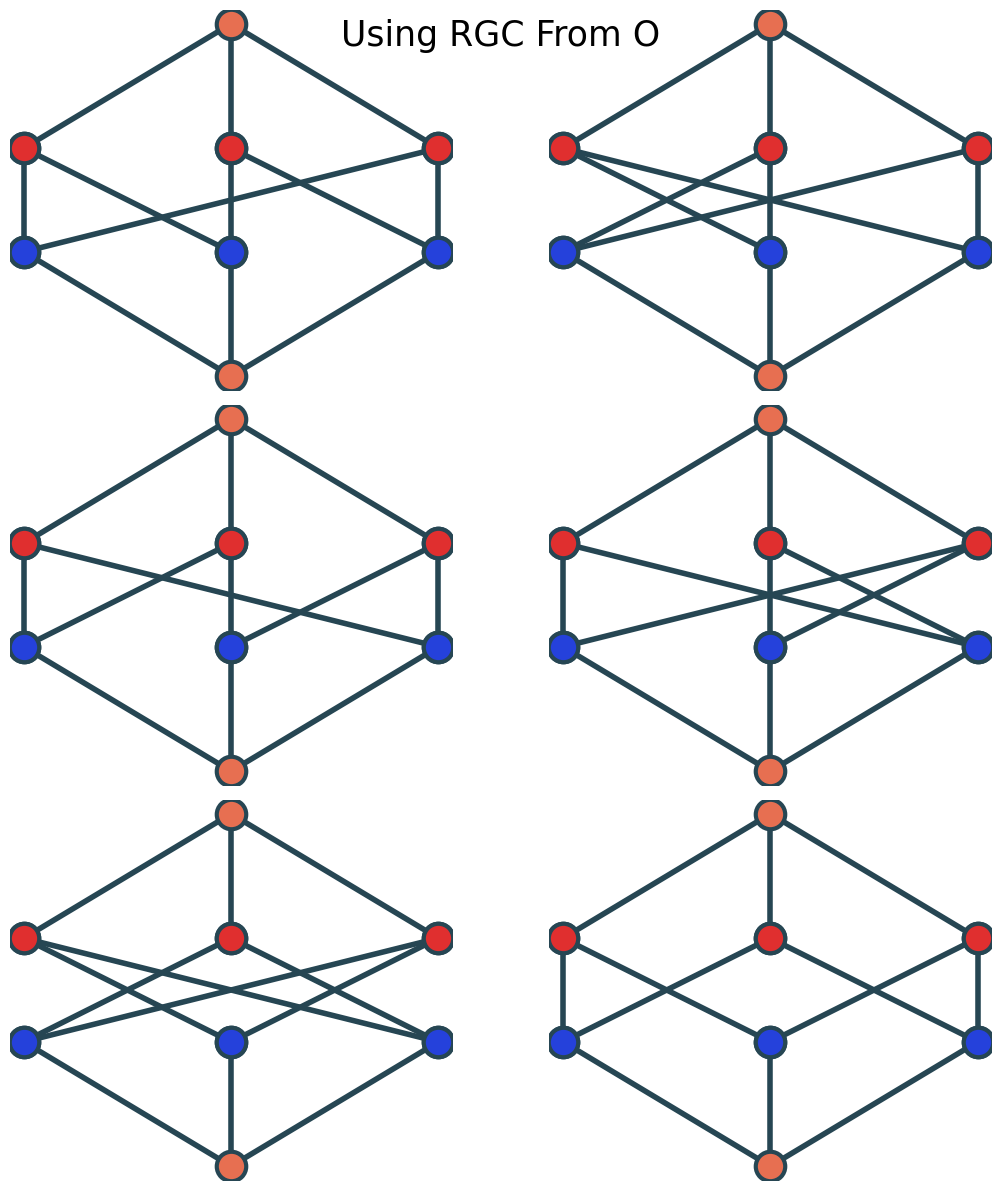

In [3]:
n = 3
necks = enumerate_necklaces(n)
O = [direct_sum(neck_permute(neck)[0],neck_permute(neck)[1] ) for neck in necks]



# Adjusting the subplot layout to 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

for idx, mat in enumerate(O):
    test_g = graph_from_adj(rgc_mat_from_O([3], mat))
    test_g.construct_adj()

    # Positions for the graph
    X = [3]
    r = [1, 2, 3]
    b = [4, 5, 6]
    pos = {key-1:value for key,value in rgc_coords(X, xd=3, yd=1.8, spacing=1.5).items()}

    # Assign each graph to the corresponding subplot
    ax = axes[idx]
    pl_graph(ax, test_g, positions=pos, vertex_size=450, outline_weight=3, edge_weight=4, margin=.2, special_colors=["#e02f2f", "#2541db"], special_indices=[r, b])

# Adjust layout to make sure there's enough space between subplots
plt.tight_layout()
fig.suptitle('Using RGC From O', fontsize=25)
plt.show()


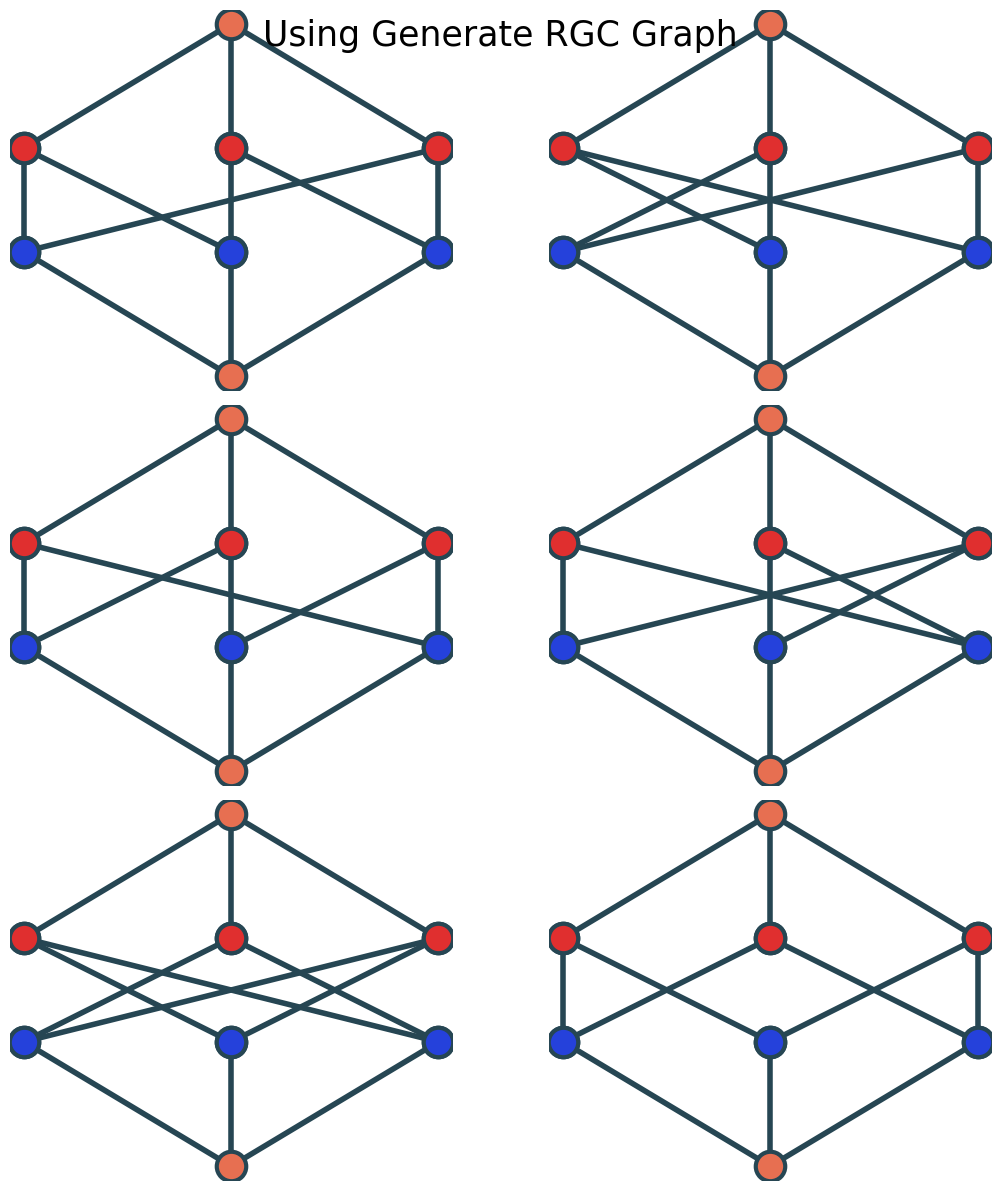

In [4]:
n = 3
necks = enumerate_necklaces(n)
# Adjusting the subplot layout to 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array to iterate over it easily
axes = axes.flatten()
X=[3]
tree =generate_ft(X)


for idx, neck in enumerate(necks):
    test_g = generate_rgc(tree,neck)
    test_g.construct_adj()

    # Positions for the graph
    X = [3]
    r = [2, 3, 4]
    b = [5, 6, 7]
    pos = {key:value for key,value in rgc_coords(X, xd=3, yd=1.8, spacing=1.5).items()}

    # Assign each graph to the corresponding subplot
    ax = axes[idx]
    pl_graph(ax, test_g, positions=pos, vertex_size=450, outline_weight=3, edge_weight=4, margin=.2, special_colors=["#e02f2f", "#2541db"], special_indices=[r, b])

# Adjust layout to make sure there's enough space between subplots
plt.tight_layout()
fig.suptitle('Using Generate RGC Graph', fontsize=25)

plt.show()


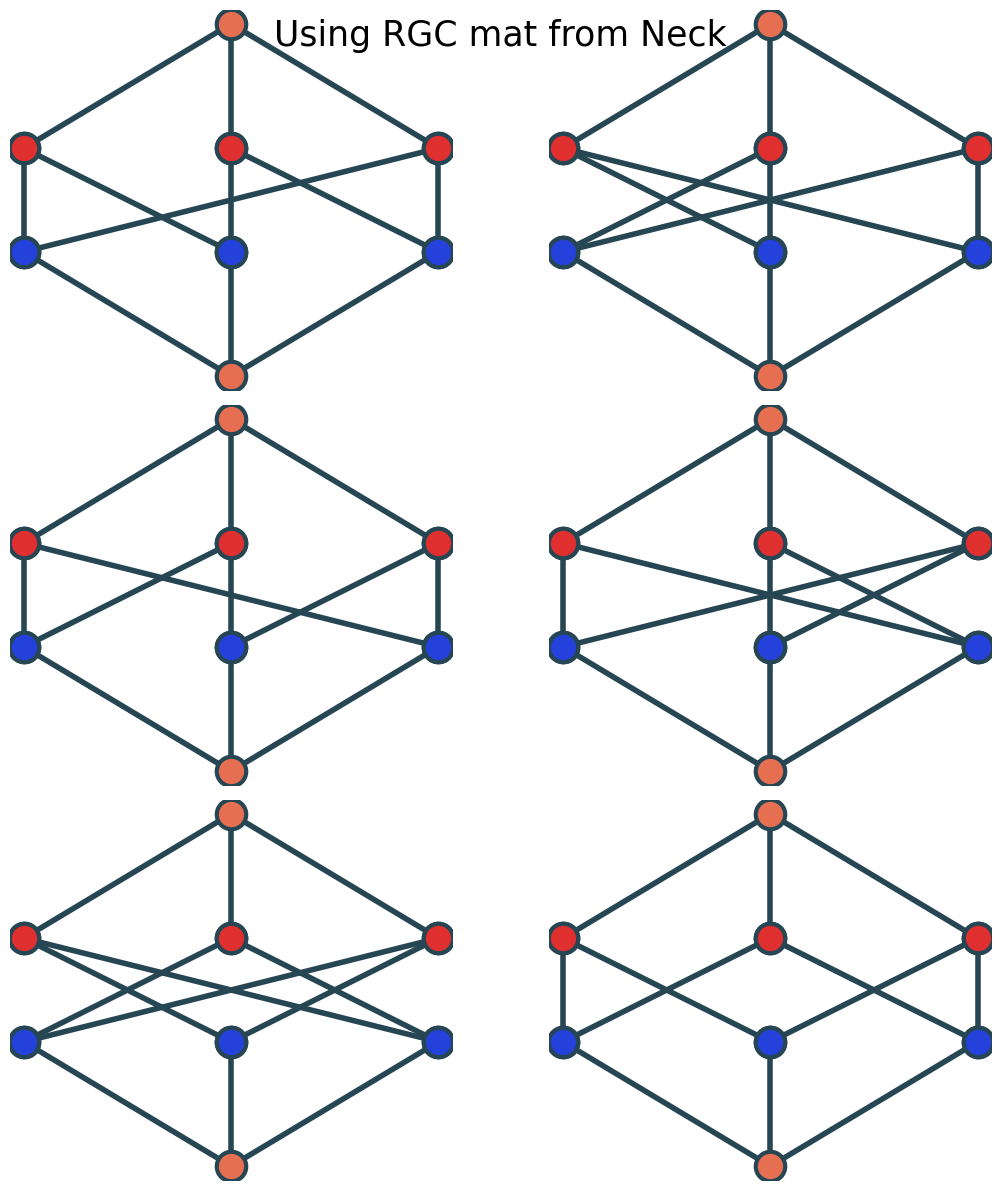

In [5]:
n = 3
necks = enumerate_necklaces(n)



# Adjusting the subplot layout to 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

for idx, neck in enumerate(necks):
    test_g = graph_from_adj(rgc_mat([3], neck))
    test_g.construct_adj()

    # Positions for the graph
    X = [3]
    r = [1, 2, 3]
    b = [4, 5, 6]
    pos = {key-1:value for key,value in rgc_coords(X, xd=3, yd=1.8, spacing=1.5).items()}

    # Assign each graph to the corresponding subplot
    ax = axes[idx]
    pl_graph(ax, test_g, positions=pos, vertex_size=450, outline_weight=3, edge_weight=4, margin=.2, special_colors=["#e02f2f", "#2541db"], special_indices=[r, b])

# Adjust layout to make sure there's enough space between subplots
plt.tight_layout()
fig.suptitle('Using RGC mat from Neck', fontsize=25)
plt.show()


# Check that the Subgraph A are unique

In [6]:
def is_close_to_any(mat, mat_set, tol=1e-10):
    """Check if mat is numerically close to any matrix in mat_set."""
    return any(np.allclose(mat, candidate, atol=tol) for candidate in mat_set)

def isUnique(mat_set, tol=1e-10):
    for idx, mat in enumerate(mat_set):
        if is_close_to_any(mat,mat_set[:idx] + mat_set[idx+1:] ):
            #print("%d is not unique" %idx)
            return False
    return True

def isClosed(neck_mats, tol=1e-10):
    """Check if the set of matrices is closed under multiplication."""
    closed=True
    illegal_pairs = []
    n = len(neck_mats)
    for i in range(n):
        for j in range(n):
            product = neck_mats[i] @ neck_mats[j]
            if not is_close_to_any(product, neck_mats, tol=tol):
                illegal_pairs.append([i,j])
                closed=False
    return closed, illegal_pairs





In [7]:
n = 3
necks = enumerate_necklaces(n)
#B = B_l(3)

O = [direct_sum(neck_permute(neck)[0],neck_permute(neck)[1] ) for neck in necks]

In [8]:
isUnique(O)

True

In [9]:
closed, illegals = isClosed(O)
print(closed)

False


In [10]:
ill_O = [O[i[0]]@O[i[1]] for i in illegals]


In [11]:
len(ill_O)

8

In [12]:
ill_O

[array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
      

In [13]:
O

[array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
      

# Check if illegal necklace is made by repeated permuation

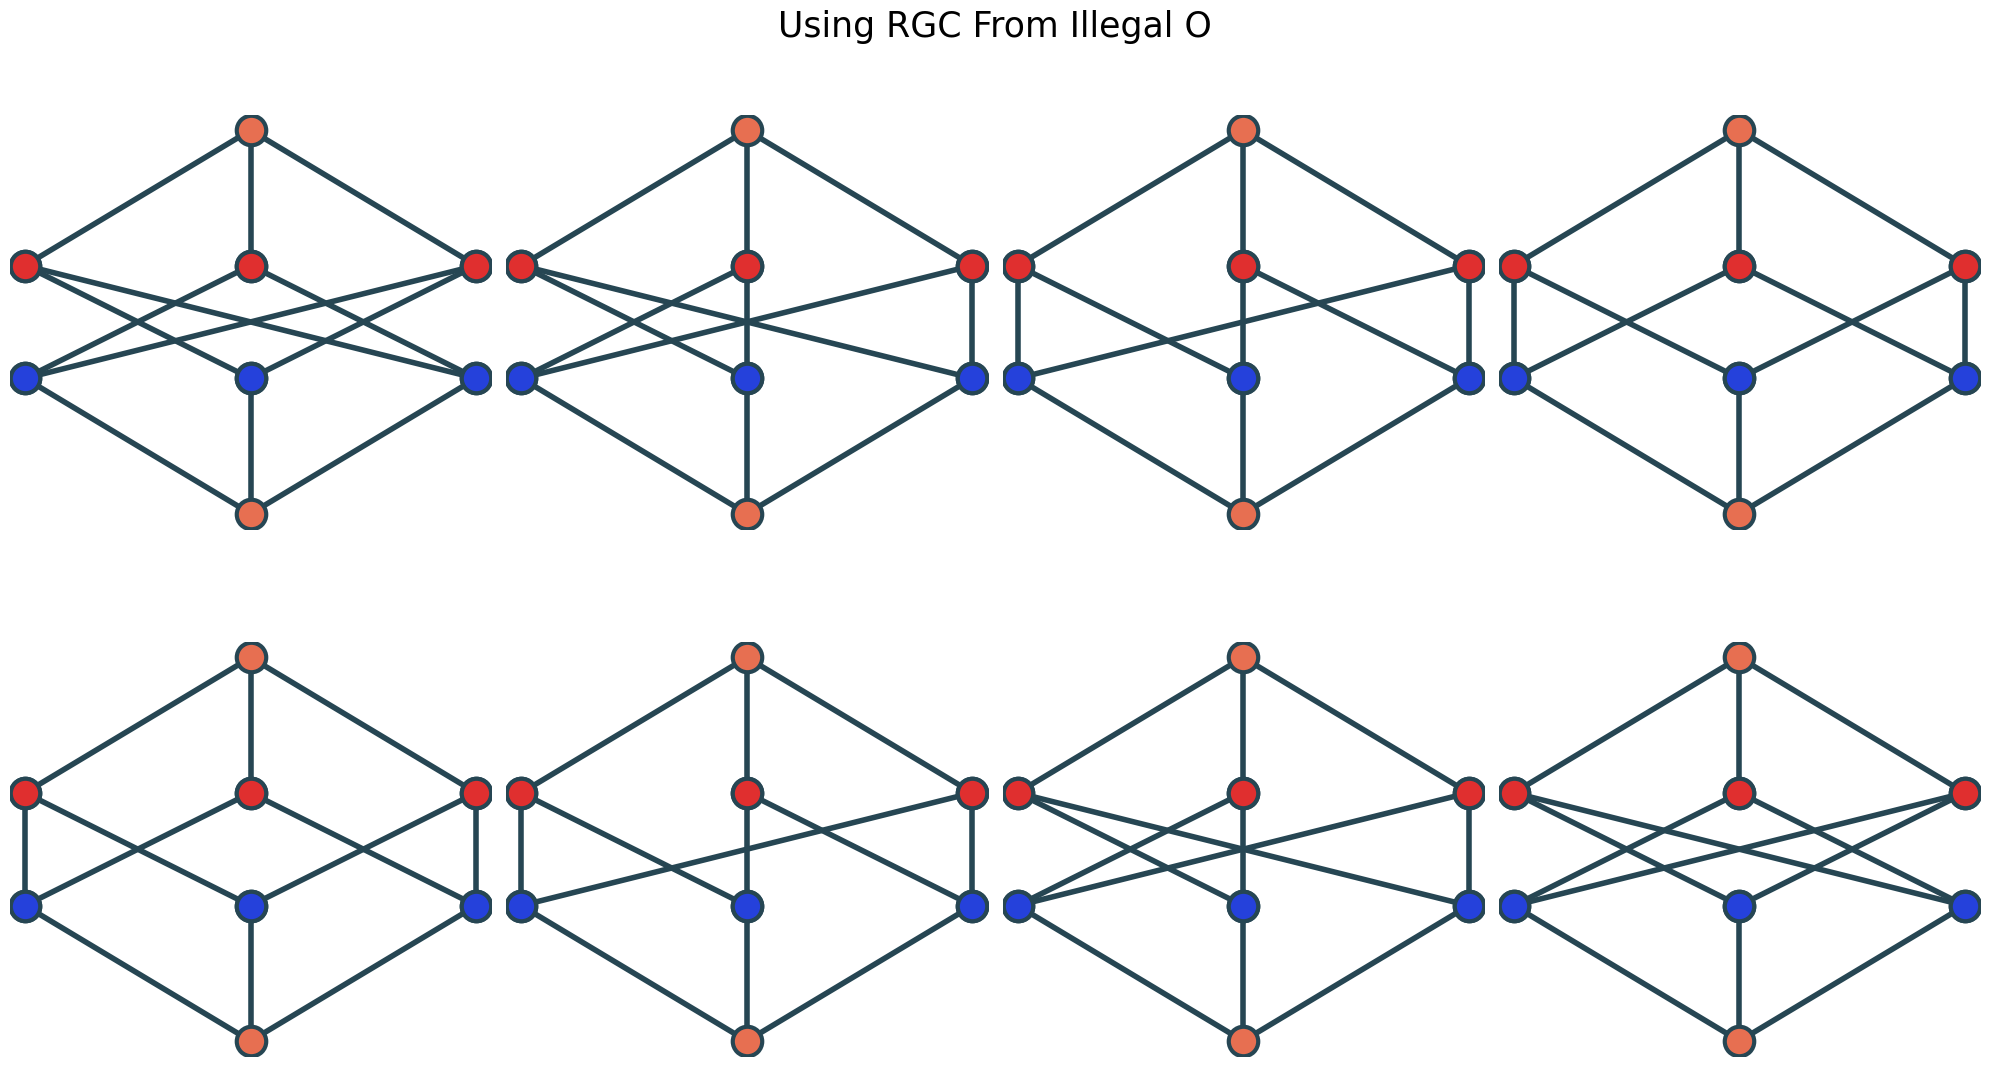

In [14]:
# Adjusting the subplot layout to 3 rows and 2 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 12))  # 3 rows, 2 columns

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

for idx, mat in enumerate(ill_O):
    test_g = graph_from_adj(rgc_mat_from_O([3], mat))
    test_g.construct_adj()

    # Positions for the graph
    X = [3]
    r = [1, 2, 3]
    b = [4, 5, 6]
    pos = {key-1:value for key,value in rgc_coords(X, xd=3, yd=1.8, spacing=1.5).items()}

    # Assign each graph to the corresponding subplot
    ax = axes[idx]
    pl_graph(ax, test_g, positions=pos, vertex_size=450, outline_weight=3, edge_weight=4, margin=.2, special_colors=["#e02f2f", "#2541db"], special_indices=[r, b])

# Adjust layout to make sure there's enough space between subplots
plt.tight_layout()
fig.suptitle('Using RGC From Illegal O', fontsize=25)
plt.show()


In [22]:
test_necklaces = set([neck_from_O(O) for O in ill_O])
isSubset(necks,test_necklaces)

True